In [2]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs4

In [3]:
continents_page = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text
continents_page

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function()

In [4]:
continents_countries_soup = bs4(continents_page,"lxml")
continents = continents_countries_soup.find_all('h2' > 'span', {"class":"mw-headline"})
continents

[<span class="mw-headline" id="Africa">Africa</span>,
 <span class="mw-headline" id="Antarctica">Antarctica</span>,
 <span class="mw-headline" id="Asia">Asia</span>,
 <span class="mw-headline" id="Europe">Europe</span>,
 <span class="mw-headline" id="North_America">North America</span>,
 <span class="mw-headline" id="South_America">South America</span>,
 <span class="mw-headline" id="Oceania">Oceania</span>,
 <span class="mw-headline" id="References">References</span>,
 <span class="mw-headline" id="Other_websites">Other websites</span>]

In [19]:
unwanted_words = ["Antarctica","References","Other websites"]
target_continents = [continent.text for continent in continents if continent.text not in unwanted_words]
target_continents

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

In [20]:
ol_html = continents_countries_soup.find_all('ol')
all_countries = [countries.find_all('li',{"class": None, "id": None}) for countries in ol_html]
all_countries

[[<li><a href="/wiki/Algeria" title="Algeria">Algeria</a> - <a href="/wiki/Algiers" title="Algiers">Algiers</a></li>,
  <li><a href="/wiki/Angola" title="Angola">Angola</a> - <a href="/wiki/Luanda" title="Luanda">Luanda</a></li>,
  <li><a href="/wiki/Benin" title="Benin">Benin</a> - <a class="mw-redirect" href="/wiki/Porto_Novo" title="Porto Novo">Porto Novo</a>, <a href="/wiki/Cotonou" title="Cotonou">Cotonou</a></li>,
  <li><a href="/wiki/Botswana" title="Botswana">Botswana</a> - <a href="/wiki/Gaborone" title="Gaborone">Gaborone</a></li>,
  <li><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a> - <a href="/wiki/Ouagadougou" title="Ouagadougou">Ouagadougou</a></li>,
  <li><a href="/wiki/Burundi" title="Burundi">Burundi</a> - <a href="/wiki/Gitega" title="Gitega">Gitega</a></li>,
  <li><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a> (also spelled Cameroun) - <a href="/wiki/Yaound%C3%A9" title="Yaoundé">Yaoundé</a></li>,
  <li><a href="/wiki/Cape_Verde" title="Ca

In [21]:
countries_in_continents = []
for items in all_countries:
    countries = []
    if items:
        for country in items:
            countries = [country.find('a').text for country in items if country.find('a')]
        countries_in_continents.append(countries)
countries_in_continents

[['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Republic of the Congo',
  'Democratic Republic of the Congo',
  "Côte d'Ivoire",
  'Djibouti',
  'Equatorial Guinea',
  'Egypt',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'The Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Réunion',
  'Rwanda',
  'São Tomé and Príncipe',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'South Africa',
  'South Sudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Western Sahara',
  'Zambia',
  'Zimbabwe'],
 ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China',
  'East Timor',
  'Georgia',
  '

In [22]:
countries_continent_category_df = pd.DataFrame(
    zip(countries_in_continents, target_continents), columns=['Country', 'Continent'])
countries_continent_category_df

,Country,Continent
0,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",Africa
1,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...",Asia
2,"[Albania, Andorra, Austria, Belarus, Belgium, ...",Europe
3,"[Canada, Mexico, United States of America, Nav...",North America
4,"[Brazil, Argentina, Bolivia, Chile, Colombia, ...",South America
5,"[Australia, Fiji, New Zealand, Federated State...",Oceania


In [23]:
countries_continent_category_df = countries_continent_category_df.explode(
    'Country').reset_index(drop=True)
countries_continent_category_df

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
201,Samoa,Oceania
202,Solomon Islands,Oceania
203,Tonga,Oceania
204,Tuvalu,Oceania


In [5]:
countries_score_page = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2020_report")
countries_score_soup = bs4(countries_score_page.content,'lxml')

In [6]:
countries_score_table = countries_score_soup.find_all('table', {'class':'wikitable sortable'})
countries_score_table

[<table class="wikitable sortable">
 <tbody><tr valign="top">
 <th style="width: 10px;">Overall rank
 </th>
 <th style="width: 250px;">Country or region
 </th></tr>
 <tr>
 <td>1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="1100" data-file-width="1800" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/23px-Flag_of_Finland.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/35px-Flag_of_Finland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/46px-Flag_of_Finland.svg.png 2x" width="23"/> </span><a href="/wiki/Finland" title="Finland">Finland</a>
 </td></tr>
 <tr>
 <td>2</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="387" data-file-width="512" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/20px-Flag_of_Denmark.svg.png" srcset="//u

In [16]:
countries_score_df = pd.read_html(str(countries_score_table))
countries_score_df

[     Overall rank              Country or region
 0               1                        Finland
 1               2                        Denmark
 2               3                        Iceland
 3               4                         Israel
 4               5                    Netherlands
 ..            ...                            ...
 132           133  Congo, Democratic Republic of
 133           134                       Zimbabwe
 134           135                   Sierra Leone
 135           136                        Lebanon
 136           137                    Afghanistan
 
 [137 rows x 2 columns],
     Overall rank Country or region
 0              1           Finland
 1              2           Denmark
 2              3           Iceland
 3              4       Switzerland
 4              5       Netherlands
 5              6        Luxembourg
 6              7            Sweden
 7              8            Norway
 8              9            Israel
 9           

In [17]:
countries_score_df = countries_score_df[2]
countries_score_df = countries_score_df.rename(columns={"Country or region":"Country"})
countries_score_df

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111


In [27]:
# Menggabungkan kedua DataFrame berdasarkan kolom country
merged_df = pd.merge(countries_continent_category_df, countries_score_df, on='Country')

# Menampilkan DataFrame hasil penggabungan
merged_df

,Country,Continent,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Algeria,Africa,100,5.005,0.944,1.143,0.745,0.084,0.119,0.129
1,Benin,Africa,86,5.216,0.366,0.352,0.328,0.406,0.197,0.126
2,Botswana,Africa,147,3.479,0.998,1.086,0.494,0.509,0.033,0.102
3,Burkina Faso,Africa,112,4.769,0.302,0.929,0.313,0.322,0.186,0.126
4,Burundi,Africa,140,3.775,0.000,0.404,0.295,0.275,0.187,0.212
...,...,...,...,...,...,...,...,...,...,...
142,Trinidad and Tobago,South America,42,6.192,1.168,1.407,0.659,0.553,0.199,0.015
143,Uruguay,South America,26,6.440,1.071,1.425,0.857,0.594,0.132,0.193
144,Venezuela,South America,99,5.053,0.770,1.349,0.767,0.272,0.087,0.064
145,Australia,Oceania,12,7.223,1.310,1.477,1.023,0.622,0.325,0.336


In [28]:
import matplotlib.pyplot as plt

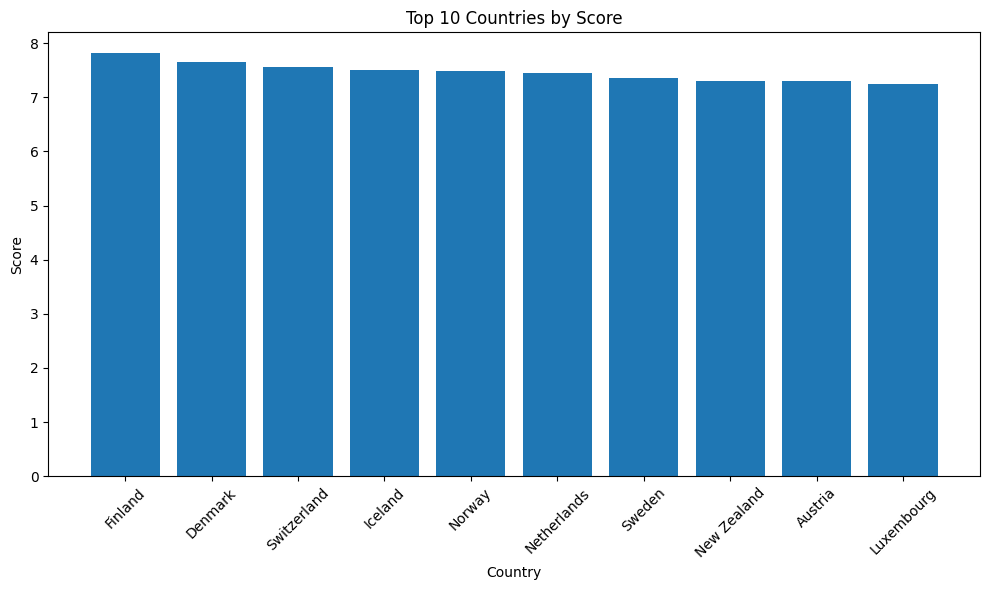

In [31]:
# Mengurutkan DataFrame berdasarkan kolom 'Score' secara menurun (descending)
sorted_df = merged_df.sort_values('Score', ascending=False)

# Mengambil 10 entri teratas
top_10 = sorted_df.head(10)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(top_10['Country'], top_10['Score'])
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 10 Countries by Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()








<ipython-input-32-0da8ada93cb7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


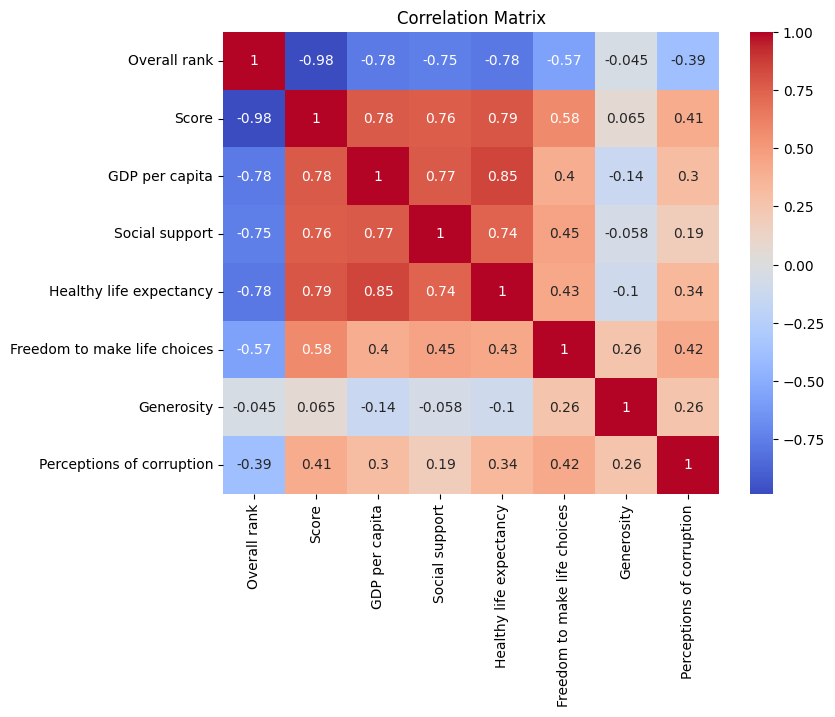

In [32]:
# Menghitung matriks korelasi
correlation_matrix = merged_df.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Menampilkan plot
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Mencari semua baris dengan nilai "Indonesia" pada kolom "Country"
result = merged_df.loc[merged_df['Country'] == 'Indonesia']

# Menampilkan hasil
result

,Country,Continent,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
49,Indonesia,Asia,84,5.286,0.892,1.155,0.61,0.568,0.543,0.038
